# IMPORTS

In [52]:
# import request library 
import requests
import json
# import plotting library
import matplotlib
import matplotlib.pyplot as plt 
import datetime
import serial
import datetime 
import re
import csv
import time
import pandas as pd
#marc.jene@upc.edu

## GET API DATA

In [53]:
GET = "/archives_json"
URL =  "https://api.esios.ree.es"


HEADERS = {
    'Accept' : 'application/json',
    'Host': 'api.esios.ree.es',
    'Authorization': 'Token token=\"6b8f5a5cf5cdb176a7214275733e706786a1457ef5a86e4814b68f9c439c1501"',
    'Content-Type' : 'application/json'
}
PARAMS = {'date' : '20201104'}

response = requests.get(url = URL+GET, headers = HEADERS, params = PARAMS)
data = response.json()

In [54]:
status = response.status_code

#Check the status code
if status < 200:
    print('informational')
    # If the status code is 200, treat the information.
elif status >= 200 and status < 300:
    print('Connection is established')
    #okBehavior(response) # runs the function to get list of archives
elif status >= 300 and status < 400:
    print('redirection')
elif status >= 400 and status < 500:
    print('client error')
else:
    print('server error')

Connection is established


## FUNCTIONS SETUP

In [55]:
# Get PVPC_CURV_DD data
def return_id(data):
    for element in data['archives']:
        if element['name'] == 'PVPC_CURV_DD':
            return element['id']

In [56]:
# startdate = datetime.datetime.now()

# if startdate.hour<20: #if it's before 20 I can't read tomorrow prices, so endate is going to be midnight
#     to_midnight = 23 - startdate.hour    
#     endate = startdate + datetime.timedelta(hours=to_midnight)
# else:
#     endate = startdate + datetime.timedelta(days=1)    # open to use tomorrows prices

In [109]:
date_today = datetime.datetime.strptime('2020-11-26 23:00:00.0', '%Y-%m-%d %H:%M:%S.%f')
print(date_today)
# date_today = datetime.date.today()                # use todays prices
date = date_today #+ datetime.timedelta(days=1)    # open to use tomorrows prices

dateend = datetime.date.today()                               # to use only one day


### Tomorrows prices can only be requested after 20:15 the day before. ###

startdate = str(date_today) + "T00:00:00.00" # can specify more if desired
enddate = str(dateend) + "T23:50:00.00"
indicator = str(600)    # market clearing (DAM) price. Imbalance is 687

# You can get it by putting the mouse over the indicator name on the webpage. 
# webpage: https://www.esios.ree.es/es/analisis/600
website = 'https://api.esios.ree.es/indicators/'+indicator+'?start_date='+startdate+'&end_date='+enddate
     
     
print('Checking dates: ' , startdate , "to" , enddate) # printing the date 

URL = website # host website
GET = '/archives_json' # API link
HEADERS = {
            'Accept': "application/json; application/vnd.esios-api-v1+json",
            'Host': 'api.esios.ree.es',
            'Authorization': "Token token=\"a6f2f926dea90ade64acc97b3b4fff73af5bdc5d7bce554a1adfa16d554ede81",
            'Content-Type': 'application/json'}
PARAMS = {'date':date}

# Runs the request to get the total URL with access token
response = requests.get(url = URL+GET, headers = HEADERS, params = PARAMS)

# Read the status code
status = response.status_code

response

2020-11-26 23:00:00
Checking dates:  2020-11-26 23:00:00T00:00:00.00 to 2020-12-03T23:50:00.00


<Response [200]>

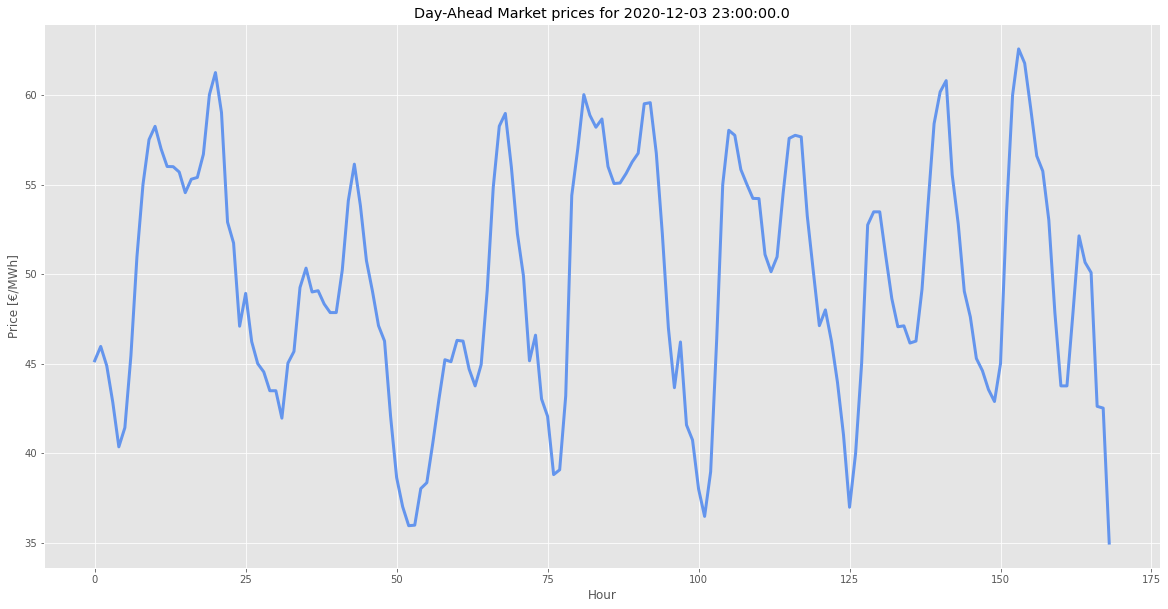

In [110]:
# Diving into the data:
marketlist = []
datetimelist = []
for stuff in response.json()["indicator"]['values']:
#     print(stuff) ## show more stuff that can be gathered
    if stuff['geo_id'] == 3: ## choose Espana. 1 = Portugal, 2 = Francia
        marketlist.append(stuff['value'])        
        date = stuff['datetime']
        date = date[:10] + ' ' + date[11:21]   

        date_time_obj = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f')
        datetimelist.append(date_time_obj)

#         date_time_obj = datetime.datetime.strptime(stuff['datetime'].strip('000+01:00'), '%Y-%m-%d %H:%M:%S.%f')
        
# print(marketlist)
# print(datetimelist)

# print(f"List of market prices for day {date} in €/MWh:")        
# print(marketlist)
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(marketlist,'r',linewidth=3, color='cornflowerblue')
plt.title(f"Day-Ahead Market prices for {date}")
plt.xlabel('Hour')
plt.ylabel('Price [€/MWh]')
plt.show() 

In [108]:
# df = pd.DataFrame({'Date': datetimelist,'Price': marketlist})
# df = df.set_index('Date')

dictionary = dict(zip(datetimelist, marketlist))
# print(df)
now = dt.datetime.now()
# print(now.year)

datetimelist

[datetime.datetime(2020, 11, 26, 23, 0)]

In [ ]:
# arduino = serial.Serial("COM4", 9600)

def getValues():
    arduino.write(b'1')
    print(1)
    data = arduino.readline().decode("utf-8")
    return data


while True:
    time.sleep(5)
    now = dt.datetime.now()
    print(now)
    if (now.second % 10 < 5): #seconds
        arduino.write(b'1')
    else:
        arduino.write(b'0')
    # relay_status = getValues()
    # print(relay_status)
    print("line read")


print("done")
arduino.close()